# 01 - Compare Various ML/AI Techniques to Diabetes Data
This is adapted from the kaggle notebook here
https://www.kaggle.com/code/alhazmi36/uas-ml/notebook

## Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# For pre-processing and data sharing
from sklearn.model_selection import train_test_split

# For handling data imbalance
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# To standardize the data
from sklearn.preprocessing import StandardScaler

# For feature selection
from sklearn.feature_selection import RFE

# Model machine learning
from sklearn.ensemble import RandomForestClassifier

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

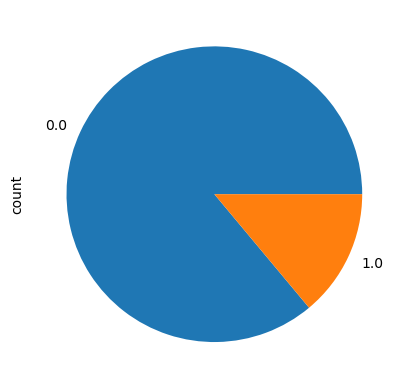

In [4]:
df['Diabetes_binary'].value_counts().plot(kind='pie')
df['Diabetes_binary'].value_counts()

## SPLIT DATA TRAIN & DATA TEST

In [5]:
# Separate features and targets
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Division of data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### Make sure the dataset is balanced

/var/folders/bw/c9j8z20x45s2y20vv6528qjc0000gq/T/ipykernel_77798/1282855888.py:8: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  print('Class distribution before resampling:', np.bincount(y_train))
/var/folders/bw/c9j8z20x45s2y20vv6528qjc0000gq/T/ipykernel_77798/1282855888.py:9: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  print('Class distribution before resampling:', np.bincount(y_train_resampled))
/var/folders/bw/c9j8z20x45s2y20vv6528qjc0000gq/T/ipykernel_77798/1282855888.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_before, ax=ax[0], palette="Set2")


Class distribution before resampling: [130931  21277]
Class distribution before resampling: [130840 130931]


/var/folders/bw/c9j8z20x45s2y20vv6528qjc0000gq/T/ipykernel_77798/1282855888.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_after, ax=ax[1], palette="Set1")


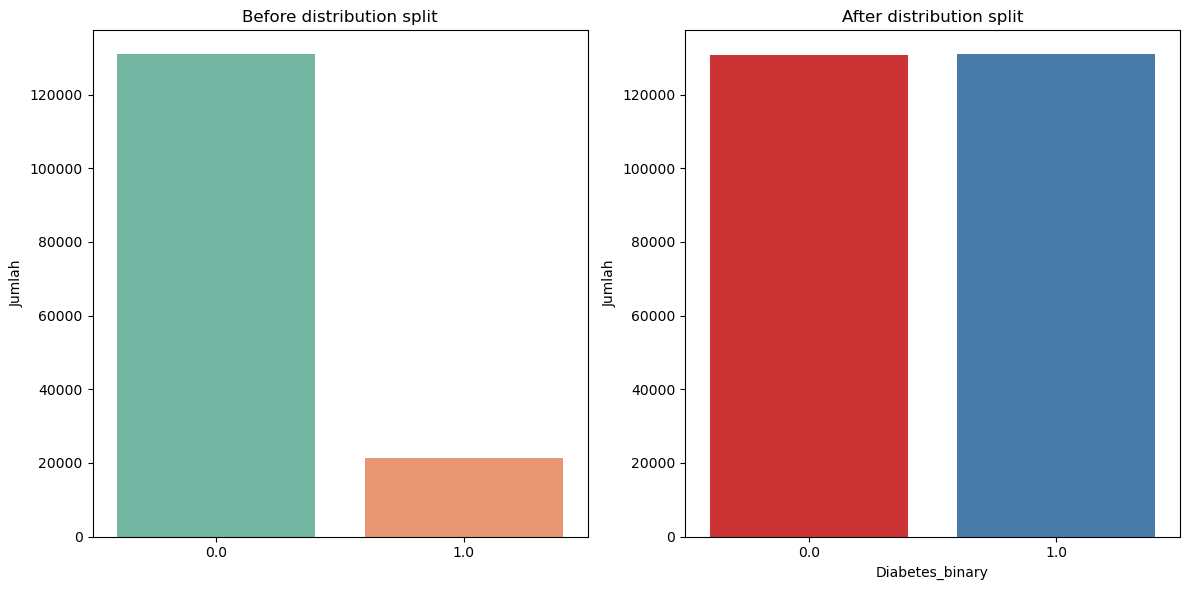

In [6]:
from imblearn.combine import SMOTETomek

# Split up the data
smt = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# Resample
print('Class distribution before resampling:', np.bincount(y_train))
print('Class distribution before resampling:', np.bincount(y_train_resampled))

# Visualization of class distribution before and after
def plot_class_distribution(y_before, y_after, title_before, title_after):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot sebelum SMOTE-Tomek
    sns.countplot(x=y_before, ax=ax[0], palette="Set2")
    ax[0].set_title(title_before)
    ax[0].set_xlabel("")
    ax[0].set_ylabel("Jumlah")

    # Plot sesudah SMOTE-Tomek
    sns.countplot(x=y_after, ax=ax[1], palette="Set1")
    ax[1].set_title(title_after)
    ax[1].set_xlabel("Diabetes_binary")
    ax[1].set_ylabel("Jumlah")

    plt.tight_layout()
    plt.show()

# Sebelum SMOTE-Tomek (y_train) dan Setelah SMOTE-Tomek (y_train_resampled)
plot_class_distribution(y_train, y_train_resampled, "Before distribution split", "After distribution split")

## Feature Selection

In [7]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
estimator2= RandomForestClassifier() 
rfecv = RFECV(estimator=estimator2, step=1, n_jobs=-1, cv=5, scoring='recall')   #5-fold cross-validation
rfecv = rfecv.fit(X_train_resampled, y_train_resampled)

# Get the best features selected by RFE
selected_rfecv = X_train_resampled.columns[rfecv.support_]

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', selected_rfecv)

Optimal number of features : 18
Best features : Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')


In [8]:
# Create a new DataFrame with only the selected features
X_train_selected_rfecv = X_train_resampled[selected_rfecv]
X_test_selected_rfecv = X_test[selected_rfecv]

# Random Forest

Accuracy: 83.37%
Precision: 41.10%
Recall: 46.08%


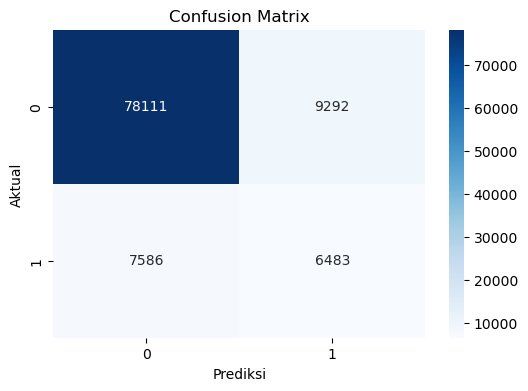

In [9]:
# Initialize the Random Forest
rf_model = RandomForestClassifier(bootstrap= True, 
                                n_estimators=200, n_jobs=-1, 
                                max_depth=20, max_features='sqrt', 
                                min_samples_leaf=1,
                                max_leaf_nodes = 150,
                                min_samples_split = 5,
                                random_state=42)

# Train the model on the processed training data
rf_model.fit(X_train_selected_rfecv, y_train_resampled)

# Prediction on test data
y_pred = rf_model.predict(X_test_selected_rfecv)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Evaluate model performance on training data
y_train_pred = rf_model.predict(X_train_selected_rfecv)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# Evaluate model performance on test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Accuracy: 87.63%
Test Accuracy: 83.37%


# KNN

Accuracy: 69.19%
Precision: 25.65%
Recall: 64.37%


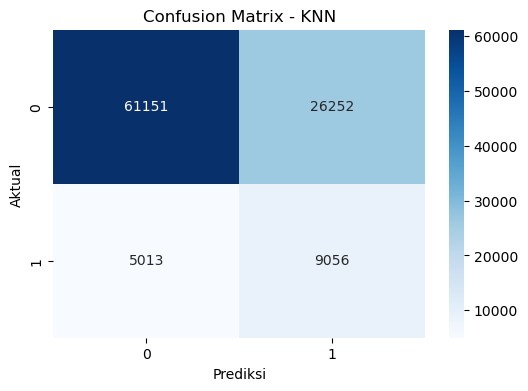

In [11]:
# Model machine learning
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', n_jobs=-1)

# Train the model on pre-processed training data
knn_model.fit(X_train_selected_rfecv, y_train_resampled)

# Prediction on test data
y_pred_knn = knn_model.predict(X_test_selected_rfecv)

# Evaluate model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print("Accuracy: {:.2f}%".format(accuracy_knn * 100))
print("Precision: {:.2f}%".format(precision_knn * 100))
print("Recall: {:.2f}%".format(recall_knn * 100))

# Confusion Matrix
cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - KNN')
plt.show()

In [12]:
# Evaluate model performance on training data
y_train_pred_knn = knn_model.predict(X_train_selected_rfecv)
train_accuracy_knn = accuracy_score(y_train_resampled, y_train_pred_knn)
print("Training Accuracy: {:.2f}%".format(train_accuracy_knn * 100))

# Evaluate model performance on the test data
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy: {:.2f}%".format(test_accuracy_knn * 100))

Training Accuracy: 88.19%
Test Accuracy: 69.19%


# SVM

In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Train the model on pre-processed training data (diabetes risk classification)
svm_model.fit(X_train_selected_rfecv, y_train_resampled)

# Prediction on test data using SVM
y_pred_svm = svm_model.predict(X_test_selected_rfecv)

# Evaluation of SVM model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label=1)
recall_svm = recall_score(y_test, y_pred_svm, pos_label=1)

print("=== SVM untuk Klasifikasi Risiko Diabetes ===")
print("Accuracy: {:.2f}%".format(accuracy_svm * 100))
print("Precision: {:.2f}%".format(precision_svm * 100))
print("Recall: {:.2f}%".format(recall_svm * 100))

# Confusion Matrix for SVM model
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot Confusion Matrix for SVM model
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - SVM (Klasifikasi Risiko Diabetes)')
plt.show()

In [ ]:
# Evaluate model performance on training data
y_train_pred_svm = svm_model.predict(X_train_selected_rfecv)
train_accuracy_svm = accuracy_score(y_train_resampled, y_train_pred_svm)
print("Training Accuracy: {:.2f}%".format(train_accuracy_svm * 100))

# Evaluate model performance on test data
test_accuracy_svm = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy_svm * 100))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Prediksi dengan model
y_pred_knn_model = knn_model.predict(X_test_selected_rfecv)
y_pred_rf_model = rf_model.predict(X_test_selected_rfecv)
y_pred_svm_model = svm_model.predict(X_test_selected_rfecv)

# Evaluasi metrik untuk masing-masing model
models = ['KNN', 'Random Forest', 'SVM']
accuracy = [
    accuracy_score(y_test, y_pred_knn_model),
    accuracy_score(y_test, y_pred_rf_model),
    accuracy_score(y_test, y_pred_svm_model)
]
precision = [
    precision_score(y_test, y_pred_knn_model),
    precision_score(y_test, y_pred_rf_model),
    precision_score(y_test, y_pred_svm_model)
    
]
recall = [
    recall_score(y_test, y_pred_knn_model),
    recall_score(y_test, y_pred_rf_model),
    recall_score(y_test, y_pred_svm_model)
]
f1 = [
    f1_score(y_test, y_pred_knn_model),
    f1_score(y_test, y_pred_rf_model),
    f1_score(y_test, y_pred_svm_model)
]
roc_auc = [
    roc_auc_score(y_test, y_pred_knn_model),
    roc_auc_score(y_test, y_pred_rf_model),
    roc_auc_score(y_test, y_pred_svm_model)
]

# Data untuk visualisasi
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
values = [accuracy, precision, recall, f1, roc_auc]

# Plot hasil perbandingan dalam bentuk bar plot
fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))

for i, metric in enumerate(metrics):
    axes[i].bar(models, values[i], color=['blue', 'red','green'])
    axes[i].set_title(metric)
    axes[i].set_ylim([0, 1])
    axes[i].set_ylabel('Score')
    for j, val in enumerate(values[i]):
        axes[i].text(j, val + 0.02, f'{val:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()